## 作业 1.1 计算Bragg curve


### 要求
计算质子和$^{12}C$在水中的Bragg curve。分别调节质子和$^{12}C$的入射能量，使两者在水中的Bragg peak 都位于127mm处，Bragg curve的横轴单位取mm，纵轴单位取 MeV/mm。
两种粒子的曲线画在一张图上。

#### 按照两种方法计算
1. 将材料切成厚度很小的薄片，此时可认为在薄片内dE/dx为常数
    - 能量为E的粒子穿过一个厚度为厚度$\Delta x$的材料后,能量损失$\Delta E$为，
$$
\Delta E=\frac{dE}{dx}(E) \cdot \Delta x
$$
    - 粒子每经过一个切片，可以得到对应的剩余能量$E$以及穿过的厚度$x$。以此类推，直至$E \to 0$。
    
    
2. 假设粒子在材料中每次损失很小的固定能损$\Delta E$
    - 能量为E的粒子的粒子损失$\Delta E$的能量时，穿过的材料厚度$\Delta x$为，
$$
\Delta x=\frac{\Delta E}{\frac{dE}{dx}(E)}
$$
    - 每一步得到剩余能量$E$和穿过的材料厚度$x$。以此类推，直至能量$E'\to 0$
 
### 预期效果
![](result.png)

### 期限
 - 至发布之日起两周内提交





### 参考代码
 - 作业1.1和作业1.2都可以从以下代码扩展得到。
 - 如果在ROOT平台上运行，按照下列步骤执行
   - 下载 [SRIM-dE/dx](srimc.C) 或 [Lise-dE/dx](lisec.C)
   - 在ROOT上运行 root -l xx.C
 - 在jupyter内运行下列代码

#### 读入LISE++ 数据文件，将$\frac{dE}{dx}$ ~ $E$ 数据存在 TGraph 中 

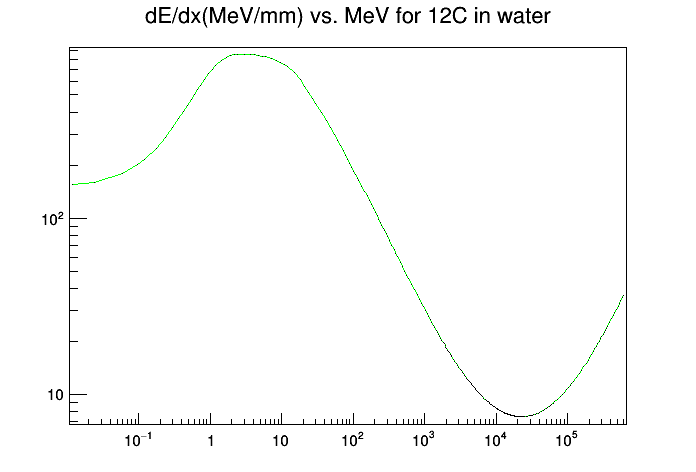

230.891


In [1]:
//%jsroot on
ifstream in("12C-water.txt");//读入LISE软件生成的12C入射到H2O的数据
string ss;
double a, b, e, dedx;
auto *g=new TGraph;//定义新的二维散点图(TGraph) g1
TCanvas c;
  if(!in.is_open()){//文件不存在则退出程序
      cout<<"Data File does not exist!"<<endl;
      return 0;
  }
getline(in,ss);
int i=0;
while(!in.eof())
{
    in >> a >> b >> e >> dedx >> a >> b >> a >> b >> a >> b >> a >> b;
    // 对照数据文件进行理解。一列一列地读入，提取第3、4列数据。
    g->SetPoint(i, e*12,dedx*1000);//添加数据点到图中，能量单位为MeV/u，对C需乘以12.
    i++;
}
g->SetTitle("dE/dx(MeV/mm) vs. MeV for 12C in water");//设定图的标题
g->SetLineColor(kGreen);
g->Draw();
gPad->SetLogy();//设定坐标轴为对数坐标轴
gPad->SetLogx();
c.Draw();
in.close();
cout<<g->Eval(0.15)<<endl;

#### 读入SRIM 数据文件，将$\frac{dE}{dx}$ ~ $E$ 数据存在 TGraph 中  

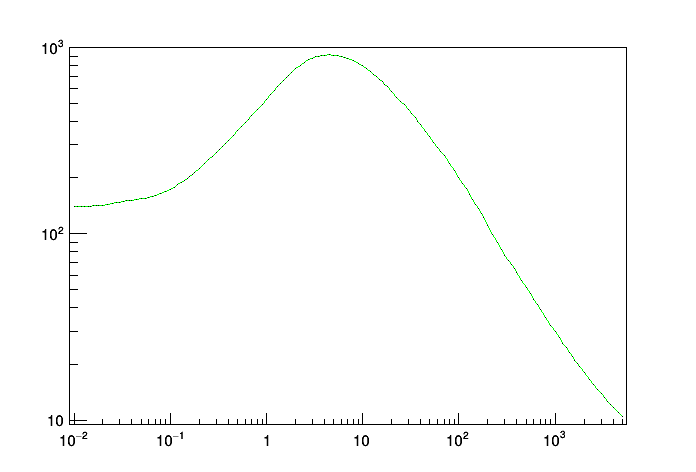

198.46


In [2]:
string sunit;
double ededx, ndedx;//ededx-电子阻止本领，ndedx-核阻止本领
ifstream in1("12C-water-srim.txt");//读入Srim2013程序生成的12C入射H2O的输出文件
TCanvas c1;
auto *g1=new TGraph; 
  if(!in1.is_open()){//文件不存在则退出程序
      cout<<"Data File does not exist!"<<endl;
      return 0;
  }

for(int j=0;j<24;j++) getline(in1,ss);//读入文件中开始的24行描述性文本
int j=0;
while(j<1000)//数据位于25-174行
{
    in1 >> e >> sunit >> ededx >> ndedx >> a >> ss >> a >> ss >> a >> ss;
    if(abs(e)<1.0e-4) break;//对于非数据，e值为零，此时停止读数据
    if(sunit=="keV") e /=1e3;
    if(sunit=="GeV") e *= 1e3;
    g1->SetPoint(j, e, ededx+ndedx);//在g1中加入点, 参考TGraph class reference 中 SetPoint()函数用法
    j++;
}
in1.close();
g1->SetLineColor(kGreen);//设置g1显示线的颜色为绿色
g1->Draw();//画g1图
gPad->SetLogx();//设置画布的x轴为logx
gPad->SetLogy();
c1.Draw();//画图
in1.close();
cout<<g1->Eval(0.15)<<endl;

### 提示：TGraph的插值函数 Eval()用法简介
观察数据文件可知软件中给出的数据点不是连续的。此时得到任意点$x_0$的数据的一般方法是用某种函数$y=f(x)$将数据点进行拟合，得到$f(x_0)$。ROOT的TGraph提供了一种方便的做法：Eval。Eval(x,0,""),将x点附近的数据点用直线方程 $y=kx+b$拟合后，内插得到x点的数据。当点的间隔比较大的时候线性假设并不成立，Eval(x,0,"S"),将x点附近的数据点用样条曲线spline拟合，可更准确地描述数据的变化。
```cpp
Double_t TGraph::Eval(Double_t x,TSpline *spline = 0,Option_t *option = "")
```
```txt
Interpolate points in this graph at x using a TSpline.
if spline==0 and option="" a linear interpolation between the two points close to x is computed. If x is outside the graph range, a linear extrapolation is computed.
if spline==0 and option="S" a TSpline3 object is created using this graph and the interpolated value from the spline is returned. the internally created spline is deleted on return.
if spline is specified, it is used to return the interpolated value.

If the points are sorted in X a binary search is used (significantly faster) One needs to set the bit TGraph::SetBit(TGraph::kIsSortedX) before calling TGraph::Eval to indicate that the graph is sorted in X.

Definition at line 863 of file TGraph.cxx.
```
对于TGraph中“空”的数据点，可以通过插值获得，比如5.1MeV/u的C12在数据文件中不存在，可通过Eval插值获得。插值分为线性插值和非线性插值。两者差异不大，用法可参考上面文档。

In [3]:
!jupyter nbconvert 1.1_bragg_curve.ipynb --to html

[NbConvertApp] Converting notebook 1.1_bragg_curve.ipynb to html

[NbConvertApp] Writing 306707 bytes to 1.1_bragg_curve.html

